In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set()

In [71]:
train_data = pd.read_excel("Data_Train.xlsx")

In [72]:
train_data.to_csv("Data_Train.csv",index=None,header=True)
train_df = pd.DataFrame(pd.read_csv("Data_Train.csv"))

In [73]:
train_df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [74]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [75]:
train_df.shape

(10683, 11)

In [76]:
#percentage of missing values in the data
(train_df.isnull().sum()/train_df.shape[0])*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [77]:
train_df.dropna(inplace=True)

In [78]:
train_df.shape

(10682, 11)

In [79]:
train_df["Jou_day"] = pd.to_datetime(train_df["Date_of_Journey"], format="%d/%m/%Y").dt.day
train_df["Jou_month"] = pd.to_datetime(train_df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
train_df.drop(["Date_of_Journey"], axis=1, inplace=True)

In [80]:
train_df["dep_hour"] = pd.to_datetime(train_df["Dep_Time"]).dt.hour
train_df["dep_min"] = pd.to_datetime(train_df["Dep_Time"]).dt.minute
train_df.drop(["Dep_Time"], axis=1,inplace=True)

In [81]:
train_df["arr_hour"] = pd.to_datetime(train_df["Arrival_Time"]).dt.hour
train_df["arr_minute"] = pd.to_datetime(train_df["Arrival_Time"]).dt.minute
train_df.drop(["Arrival_Time"],axis=1,inplace=True)

In [82]:
train_df.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Jou_day  Jou_month  dep_hour  dep_min  \
0    non-stop         No info   3897       24          3        22       20   
1     2 stops         No info   7662        1          5         5       50   
2     2 stops         No info  13882        9          6         9       25   
3      1 stop         No info   6218       12          5        18        5   
4      1 stop         No info  13302        1          3        16       50   

   arr_hour  arr_minute  
0         1          10  
1        13          15  
2         4          25  
3        23          30  
4        21          35

In [83]:
duration = list(train_df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split())==1:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]     

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [84]:
train_df["Duration_hours"] = duration_hours
train_df["Duration_mins"] = duration_mins

In [85]:
train_df.drop(["Duration"],axis=1,inplace=True)

In [86]:
train_df.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  Jou_day  Jou_month  dep_hour  dep_min  arr_hour  \
0         No info   3897       24          3        22       20         1   
1         No info   7662        1          5         5       50        13   
2         No info  13882        9          6         9       25         4   
3         No info   6218       12          5        18        5        23   
4         No info  13302        1          3        16       50        21   

   arr_minute  Duration_hours  Duration_mins  
0          10               2             50  
1          15               7             25  
2          25              19              0  
3          30               5             25  
4          35               4             45

In [87]:
train_df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [88]:
train_df.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [89]:
train_cat_data = train_df.select_dtypes(exclude=['int64','float','int32'])
train_num_data = train_df.select_dtypes(include=['int64', 'float','int32'])
train_cat_data.head()

Airline    Source Destination Total_Stops
0       IndiGo  Banglore   New Delhi    non-stop
1    Air India   Kolkata    Banglore     2 stops
2  Jet Airways     Delhi      Cochin     2 stops
3       IndiGo   Kolkata    Banglore      1 stop
4       IndiGo  Banglore   New Delhi      1 stop

In [90]:
train_cat_data = train_cat_data.apply(LabelEncoder().fit_transform)
train_cat_data.head()

Airline  Source  Destination  Total_Stops
0        3       0            5            4
1        1       3            0            1
2        4       2            1            1
3        3       3            0            0
4        3       0            5            0

In [91]:
train_data = pd.concat([train_cat_data,train_num_data],axis=1)
train_data.head()

Airline  Source  Destination  Total_Stops  Price  Jou_day  Jou_month  \
0        3       0            5            4   3897       24          3   
1        1       3            0            1   7662        1          5   
2        4       2            1            1  13882        9          6   
3        3       3            0            0   6218       12          5   
4        3       0            5            0  13302        1          3   

   dep_hour  dep_min  arr_hour  arr_minute  Duration_hours  Duration_mins  
0        22       20         1          10               2             50  
1         5       50        13          15               7             25  
2         9       25         4          25              19              0  
3        18        5        23          30               5             25  
4        16       50        21          35               4             45

In [92]:
train_data["Duration_minutes"] = train_data["Duration_hours"]*60 + train_data["Duration_mins"]
train_data.drop(["Duration_hours","Duration_minutes"],axis=1,inplace=True)
train_data.head()

Airline  Source  Destination  Total_Stops  Price  Jou_day  Jou_month  \
0        3       0            5            4   3897       24          3   
1        1       3            0            1   7662        1          5   
2        4       2            1            1  13882        9          6   
3        3       3            0            0   6218       12          5   
4        3       0            5            0  13302        1          3   

   dep_hour  dep_min  arr_hour  arr_minute  Duration_mins  
0        22       20         1          10             50  
1         5       50        13          15             25  
2         9       25         4          25              0  
3        18        5        23          30             25  
4        16       50        21          35             45

## Test data

In [93]:
test_data = pd.read_excel("Test_set.xlsx")
test_data.to_csv("Test_set.csv",index=None,header=True)
test_df = pd.DataFrame(pd.read_csv("Test_set.csv"))

In [94]:
test_df.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [95]:
test_df.shape

(2671, 10)

In [96]:
test_df.dropna(inplace=True)

In [97]:
test_df.shape

(2671, 10)

In [98]:
test_df["jou_day"] = pd.to_datetime(test_df["Date_of_Journey"],format="%d/%m/%Y").dt.day
test_df["jou_month"] = pd.to_datetime(test_df["Date_of_Journey"],format="%d/%m/%Y").dt.month
test_df.drop(["Date_of_Journey"],axis=1,inplace=True)

In [99]:
test_df["dep_hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df["dep_min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute
test_df.drop(["Dep_Time"],axis=1,inplace=True)

In [100]:
test_df["arr_hour"] = pd.to_datetime(test_df["Arrival_Time"]).dt.hour
test_df["arr_minute"] = pd.to_datetime(test_df["Arrival_Time"]).dt.minute
test_df.drop(["Arrival_Time"],axis=1,inplace=True)

In [101]:
duration = list(test_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) == 1:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]          

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))  
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

test_df["Duration_hours"] = duration_hours
test_df["Duration_mins"] = duration_mins
test_df.drop(["Duration"], axis = 1, inplace = True)


In [102]:
test_df.shape

(2671, 14)

In [103]:
test_df.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [104]:
train_df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [105]:
test_cat_data = test_df.select_dtypes(exclude=['int64', 'float','int32'])
test_num_data = test_df.select_dtypes(include=['int64', 'float','int32'])
test_cat_data.head()

Airline    Source Destination Total_Stops
0        Jet Airways     Delhi      Cochin      1 stop
1             IndiGo   Kolkata    Banglore      1 stop
2        Jet Airways     Delhi      Cochin      1 stop
3  Multiple carriers     Delhi      Cochin      1 stop
4           Air Asia  Banglore       Delhi    non-stop

In [106]:
test_cat_data = test_cat_data.apply(LabelEncoder().fit_transform)

In [107]:
test_cat_data.head()

Airline  Source  Destination  Total_Stops
0        4       2            1            0
1        3       3            0            0
2        4       2            1            0
3        6       2            1            0
4        0       0            2            4

In [108]:
test_data = pd.concat([test_cat_data,test_num_data],axis=1)

In [109]:
test_data["Duration_minutes"] = test_data["Duration_hours"]*60 + test_data["Duration_mins"]
test_data.drop(["Duration_hours","Duration_minutes"],axis=1,inplace=True)
test_data.head()

Airline  Source  Destination  Total_Stops  jou_day  jou_month  dep_hour  \
0        4       2            1            0        6          6        17   
1        3       3            0            0       12          5         6   
2        4       2            1            0       21          5        19   
3        6       2            1            0       21          5         8   
4        0       0            2            4       24          6        23   

   dep_min  arr_hour  arr_minute  Duration_mins  
0       30         4          25             55  
1       20        10          20              0  
2       15        19           0             45  
3        0        21           0              0  
4       55         2          45             50

In [110]:
test_data.head()

Airline  Source  Destination  Total_Stops  jou_day  jou_month  dep_hour  \
0        4       2            1            0        6          6        17   
1        3       3            0            0       12          5         6   
2        4       2            1            0       21          5        19   
3        6       2            1            0       21          5         8   
4        0       0            2            4       24          6        23   

   dep_min  arr_hour  arr_minute  Duration_mins  
0       30         4          25             55  
1       20        10          20              0  
2       15        19           0             45  
3        0        21           0              0  
4       55         2          45             50

In [111]:
train_data.head()

Airline  Source  Destination  Total_Stops  Price  Jou_day  Jou_month  \
0        3       0            5            4   3897       24          3   
1        1       3            0            1   7662        1          5   
2        4       2            1            1  13882        9          6   
3        3       3            0            0   6218       12          5   
4        3       0            5            0  13302        1          3   

   dep_hour  dep_min  arr_hour  arr_minute  Duration_mins  
0        22       20         1          10             50  
1         5       50        13          15             25  
2         9       25         4          25              0  
3        18        5        23          30             25  
4        16       50        21          35             45

In [112]:
X = train_data.drop("Price",axis=1)
Y = train_data["Price"].to_frame()
print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
temp = sc.fit_transform(X)
X = pd.DataFrame(temp,columns=X.columns)

In [114]:
X.head()

Airline    Source  Destination  Total_Stops   Jou_day  Jou_month  \
0 -0.410805 -1.658359     2.416534     1.407210  1.237288  -1.467402   
1 -1.261152  0.890014    -0.973812    -0.253703 -1.475307   0.250289   
2  0.014369  0.040556    -0.295743    -0.253703 -0.531796   1.109135   
3 -0.410805  0.890014    -0.973812    -0.807341 -0.177979   0.250289   
4 -0.410805 -1.658359     2.416534    -0.807341 -1.475307  -1.467402   

   dep_hour   dep_min  arr_hour  arr_minute  Duration_mins  
0  1.654154 -0.234950 -1.800436   -0.890014       1.279041  
1 -1.303113  1.363607 -0.050909   -0.587094      -0.196319  
2 -0.607286  0.031476 -1.363054    0.018745      -1.671678  
3  0.958326 -1.034229  1.407030    0.321664      -0.196319  
4  0.610412  1.363607  1.115442    0.624584       0.983969

In [115]:
Y.head()

Price
0   3897
1   7662
2  13882
3   6218
4  13302

### Choosing a suitable regression model

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [117]:
de_tr = DecisionTreeRegressor()
knn = KNeighborsRegressor()
li_r = LinearRegression()

In [118]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
for i in [de_tr, knn, li_r]:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print(i)
    print("R2 score = ",r2_score(y_test,pred))
    print("R2 for train data = ",r2_score(y_train,i.predict(x_train)))
    print("Mean absolute error = ",mean_absolute_error(y_test,pred))
    print("Mean squared error = ",mean_squared_error(y_test,pred))
    print("Root mean squared error = ",mean_squared_error(y_test,pred,squared=False))
    print("\n")

DecisionTreeRegressor()
R2 score =  0.735536053471148
R2 for train data =  0.9728477696094954
Mean absolute error =  1348.6504212168486
Mean squared error =  5395309.556013001
Root mean squared error =  2322.78056561807


KNeighborsRegressor()
R2 score =  0.7171868435379385
R2 for train data =  0.7918655999562134
Mean absolute error =  1590.5917628705147
Mean squared error =  5769650.440648986
Root mean squared error =  2402.009667059853


LinearRegression()
R2 score =  0.40160579829516074
R2 for train data =  0.3634140274527926
Mean absolute error =  2585.086820365689
Mean squared error =  12207796.17447277
Root mean squared error =  3493.9656802082027




In [119]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
ran_for_reg = RandomForestRegressor()
adaboost = AdaBoostRegressor()
gradient = GradientBoostingRegressor()

In [120]:
Y = train_data["Price"]
type(Y)

pandas.core.series.Series

In [121]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
for i in [ran_for_reg, adaboost, gradient]:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print(i)
    print("R2 score = ",r2_score(y_test,pred))
    print("R2 for train data = ",r2_score(y_train,i.predict(x_train)))
    print("Mean absolute error = ",mean_absolute_error(y_test,pred))
    print("Mean squared error = ",mean_squared_error(y_test,pred))
    print("Root mean squared error = ",mean_squared_error(y_test,pred,squared=False))
    print("\n")

RandomForestRegressor()
R2 score =  0.8306504592306728
R2 for train data =  0.9543787962252693
Mean absolute error =  1160.2953504823136
Mean squared error =  3454887.5474770386
Root mean squared error =  1858.7327800082073


AdaBoostRegressor()
R2 score =  0.3602525993655883
R2 for train data =  0.4041486438397379
Mean absolute error =  2948.8666826983663
Mean squared error =  13051439.7496551
Root mean squared error =  3612.677642643348


GradientBoostingRegressor()
R2 score =  0.7885810789915343
R2 for train data =  0.7764814035976191
Mean absolute error =  1496.419889285819
Mean squared error =  4313141.884973309
Root mean squared error =  2076.810507719303




## Model Building

In [122]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [123]:
y_pred = model.predict(x_test)

In [124]:
model.score(x_test,y_test)

0.8325054550203995

In [125]:
model.score(x_train,y_train)

0.9541005516170479

In [126]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.8325054550203995

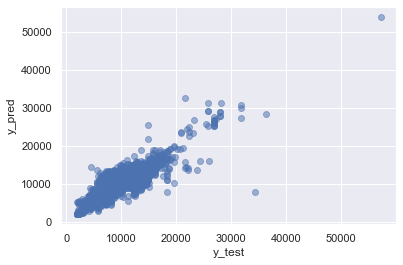

In [127]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# hyperparameter tuning

In [128]:
from sklearn.model_selection import RandomizedSearchCV

In [129]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ["auto","sqrt"]
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [130]:
Grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [131]:
para_model = RandomizedSearchCV(estimator = model, param_distributions = Grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [132]:
para_model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [133]:
para_model.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [134]:
new_pred = para_model.predict(x_test)

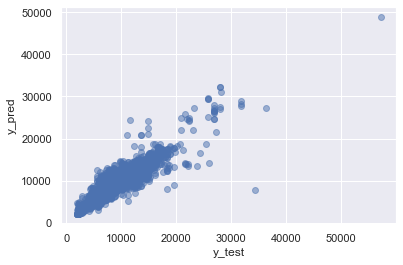

In [135]:
plt.scatter(y_test, new_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [136]:
from sklearn import metrics
metrics.r2_score(y_test,new_pred)

0.8446110711386025